In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/Admission_Predict.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(400, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

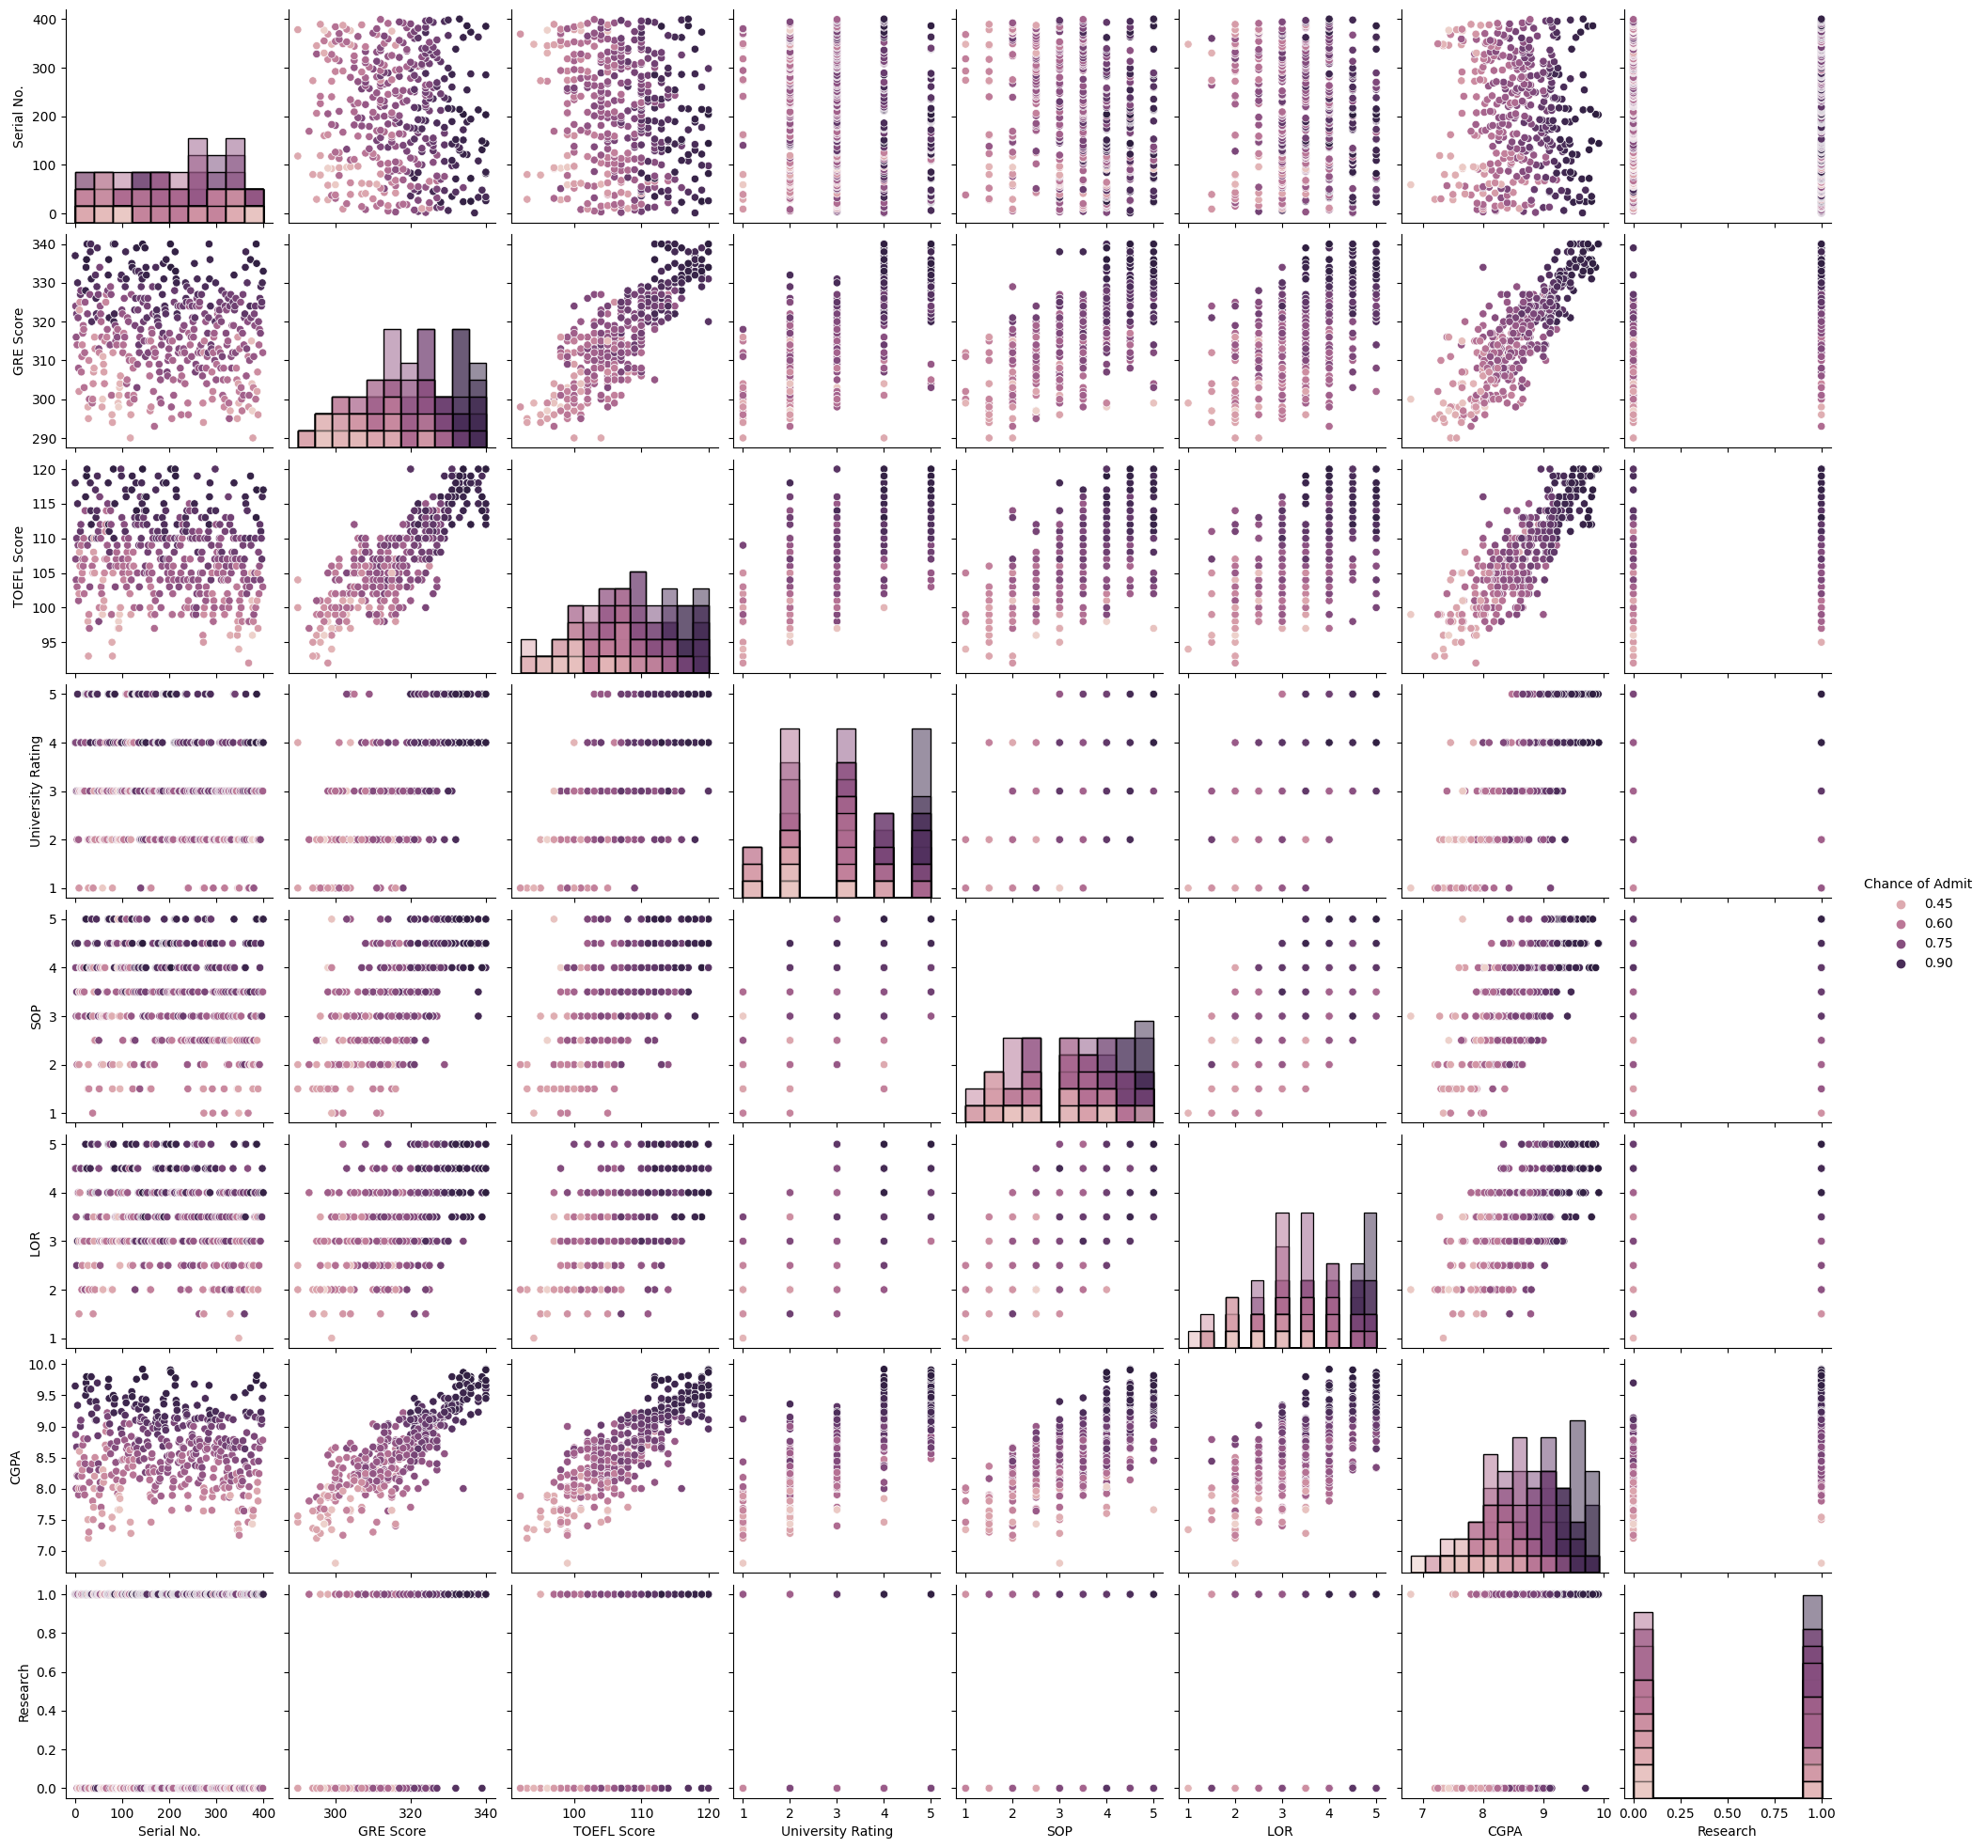

In [ ]:
sns.pairplot(df,hue="Chance of Admit ",diag_kind="hist")

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

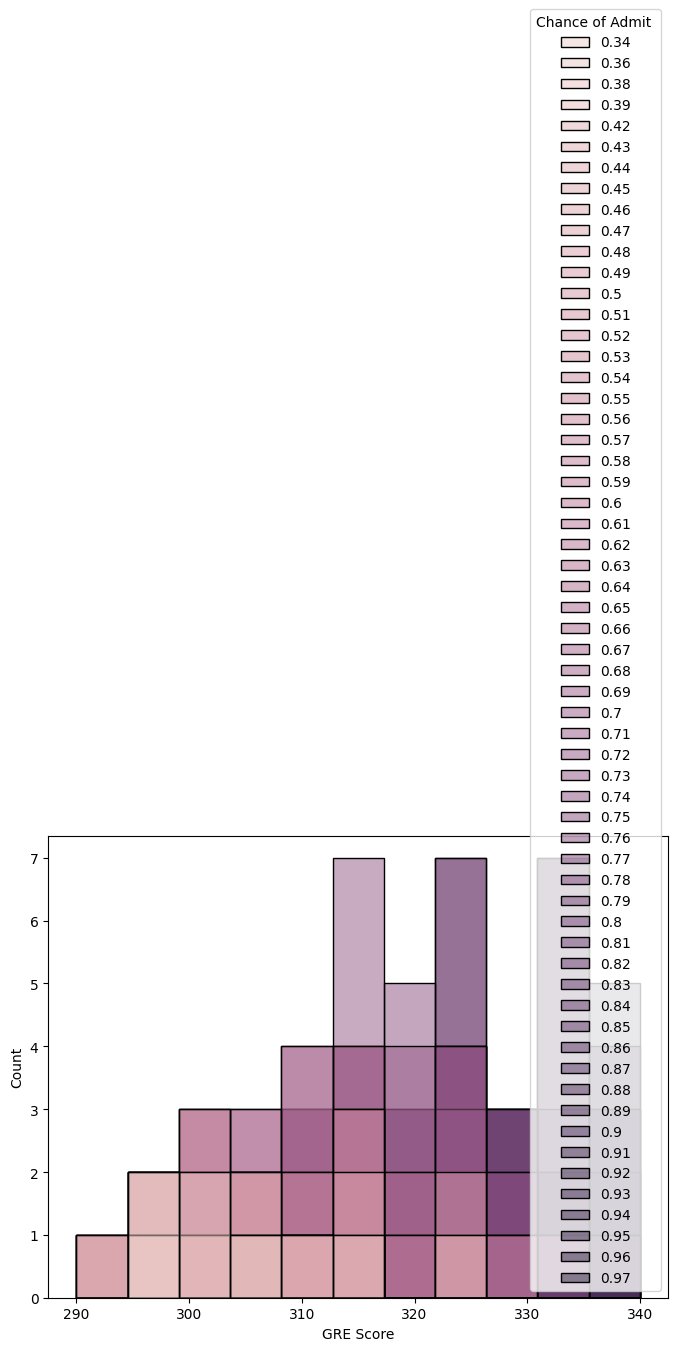

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x="GRE Score",hue="Chance of Admit ",data=df)
plt.show()

<Axes: xlabel='SOP', ylabel='Count'>

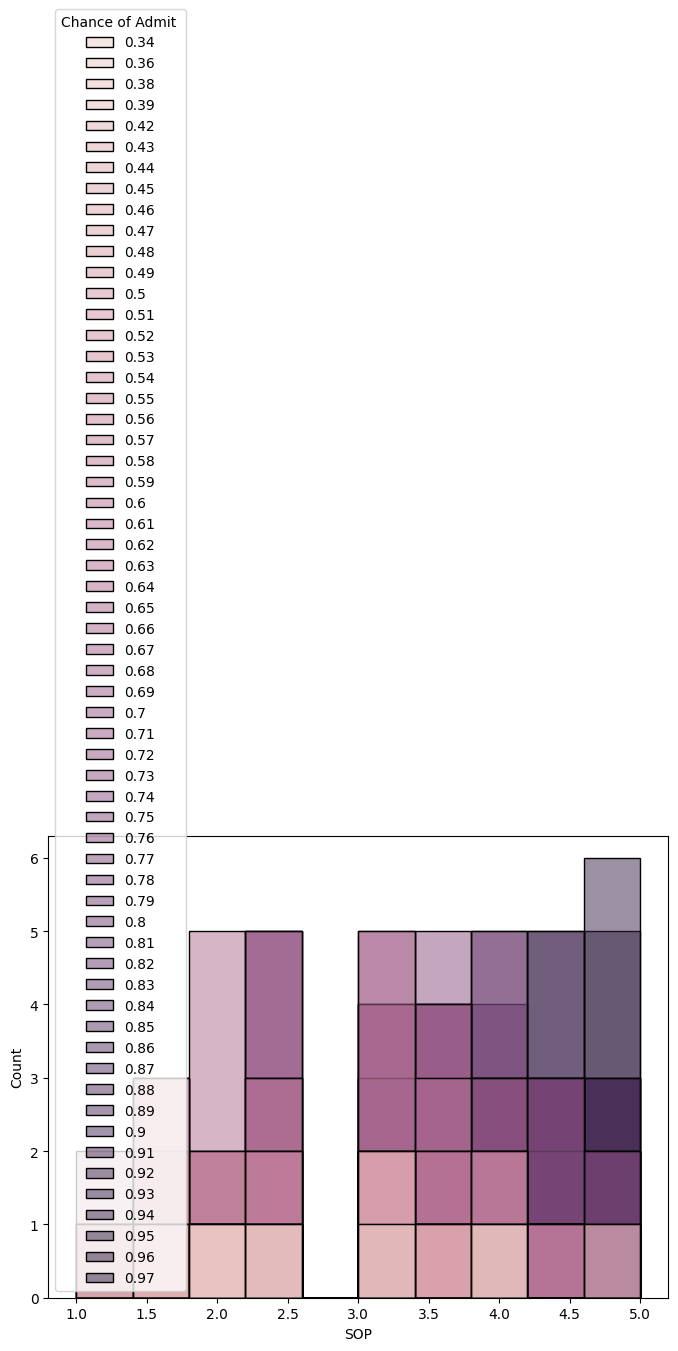

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x="SOP",hue="Chance of Admit ",data=df)

<Axes: xlabel='LOR ', ylabel='Count'>

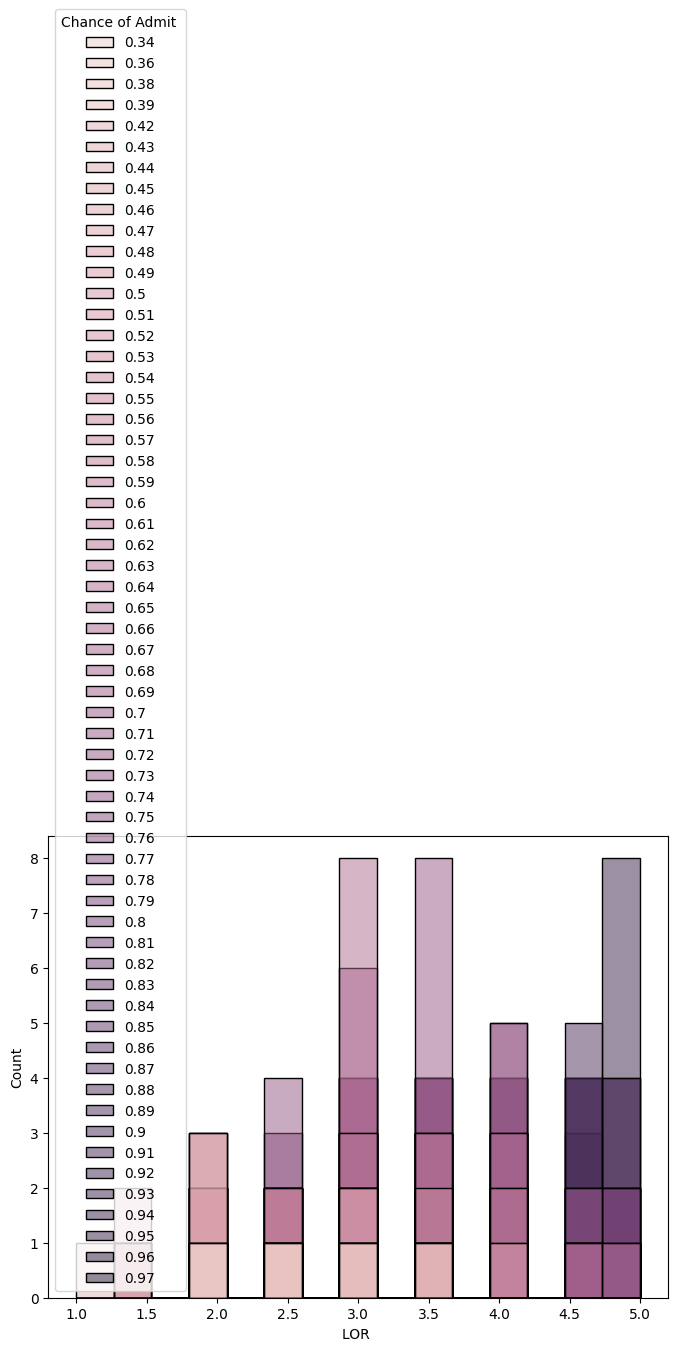

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x="LOR ",hue="Chance of Admit ",data=df)

<Axes: xlabel='TOEFL Score', ylabel='Count'>

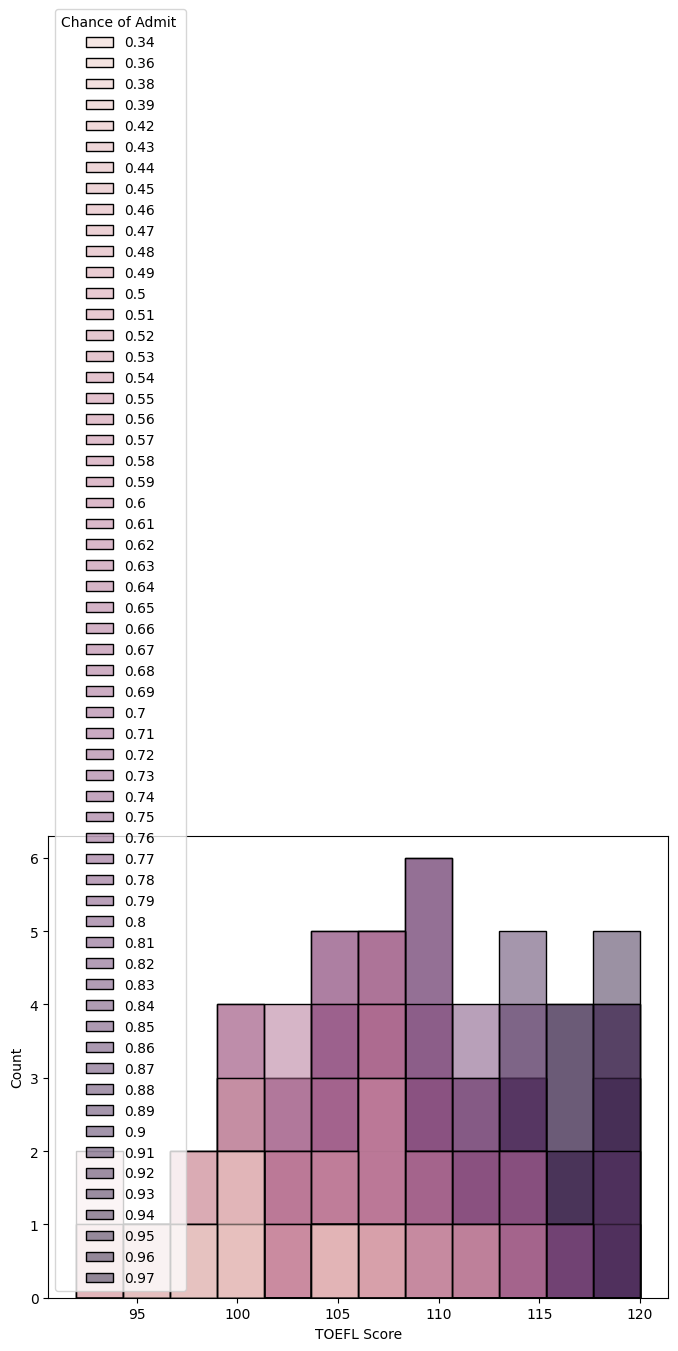

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x="TOEFL Score",hue="Chance of Admit ",data=df)

<Axes: xlabel='CGPA', ylabel='Count'>

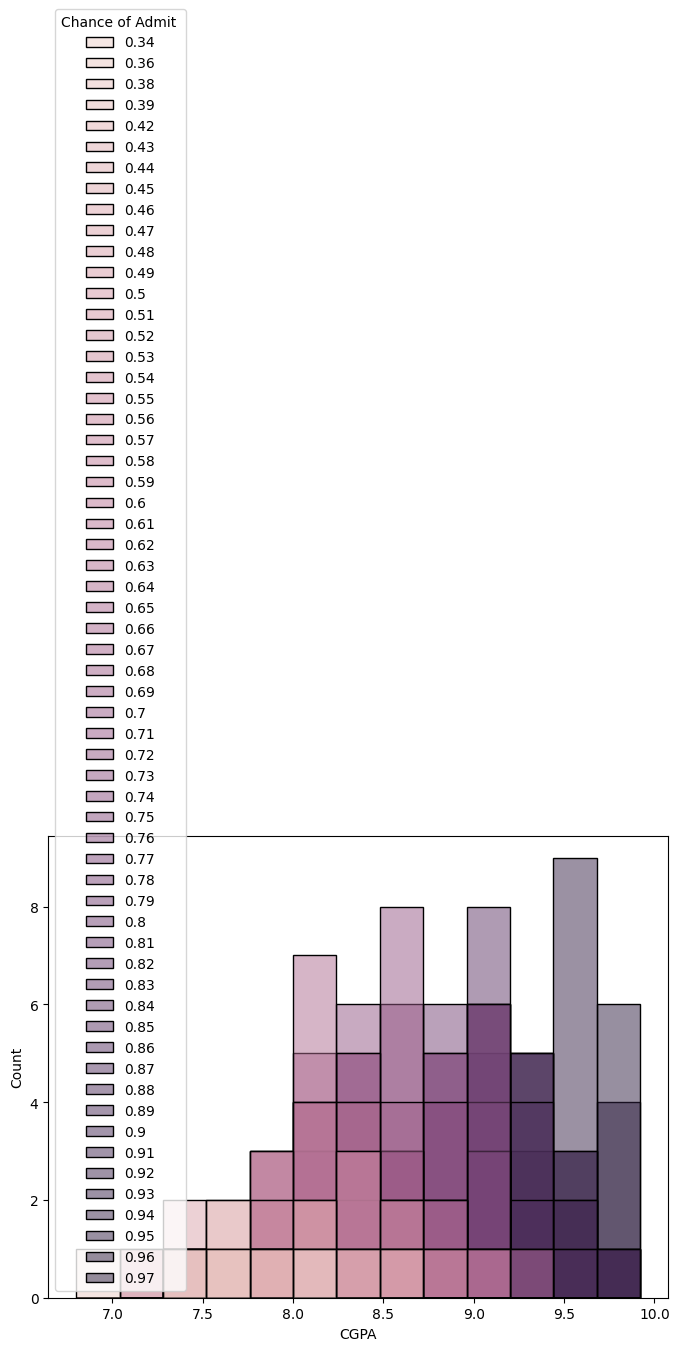

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x="CGPA",hue="Chance of Admit ",data=df)

<Axes: xlabel='Research', ylabel='Count'>

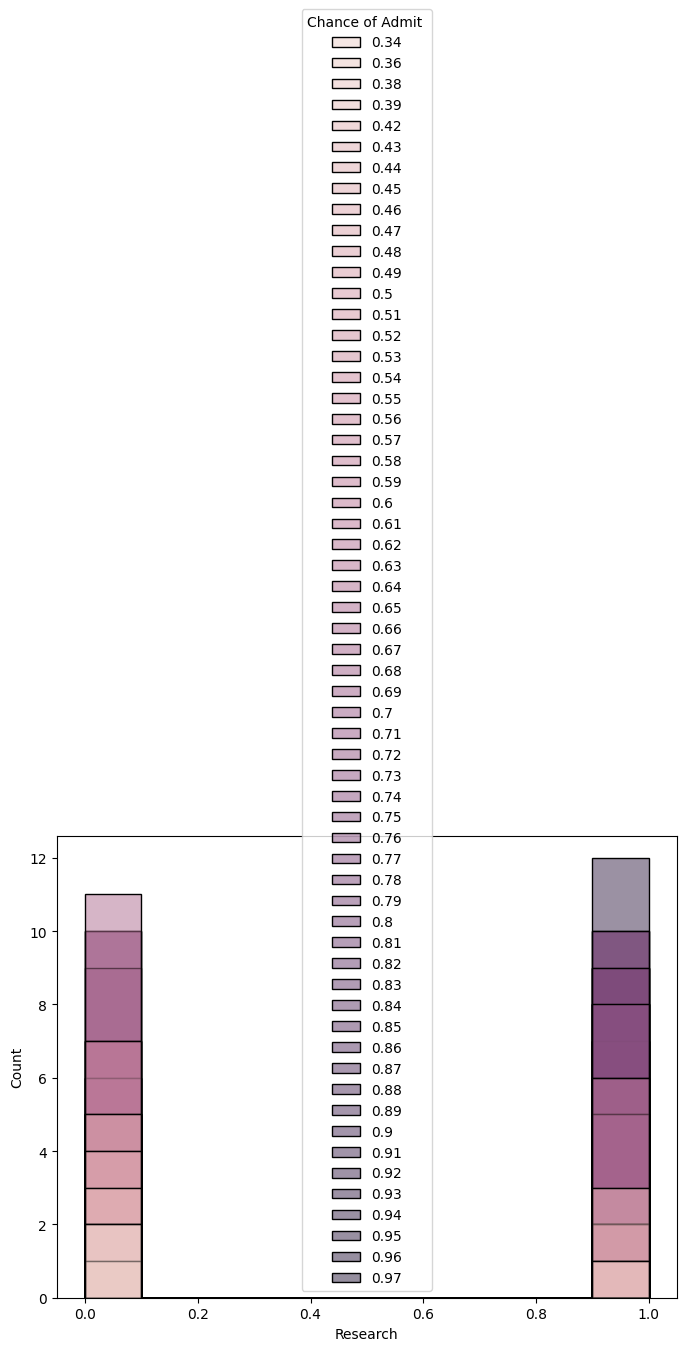

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x="Research",hue="Chance of Admit ",data=df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

In [ ]:
df.iloc[:,1]=en.fit_transform(df.iloc[:,1].values)

In [ ]:
df.iloc[:,1]

0      45
1      32
2      24
3      30
4      22
       ..
395    32
396    33
397    38
398    20
399    41
Name: GRE Score, Length: 400, dtype: int64

In [ ]:
df.iloc[:,1:14].corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.836845,0.669845,0.612604,0.557482,0.833104,0.580573,0.802570
TOEFL Score,0.836845,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.669845,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612604,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557482,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833104,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580573,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802570,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [ ]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: >

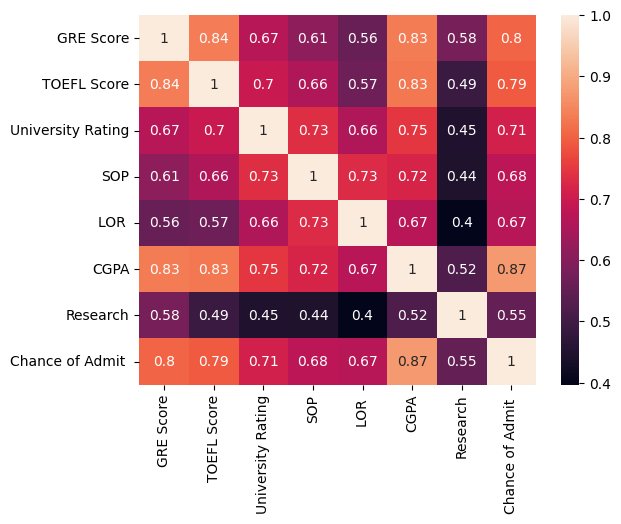

In [ ]:
sns.heatmap(df.iloc[:,1:13].corr(),annot=True)

In [ ]:
X=df.iloc[:,2:31].values

In [ ]:
y=df.iloc[:,1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)

1.0